In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.hbos import HBOS
from pyod.utils.data import evaluate_print

In [2]:
column_names = [
    'timestamp', 'duration', 'source_ip', 'dst_ip', 'source_port', 'dst_port',
    'protocol', 'flags', 'forward_status', 'type_of_service', 'packets', 'bytes', 'type'
]

dtypes = {
    #'timestamp': datetime,
    'duration': float,
    'source_ip': str,
    'dst_ip': str,
    'source_port': int,
    'dst_port': int,
    'protocol': str,
    'flags': str,
    'forward_status': int,
    'type_of_service': int,
    'packets': int,
    'bytes': int,
    'type': str
}

In [3]:
df = pd.read_csv('./data/training/uniq/20160318.csv', header=None, names=column_names, dtype=dtypes, parse_dates=[0])
#df2 = pd.read_csv('./data/march/week3/spam_flows_cut.csv', nrows=100, header=None, names=column_names, dtype=dtypes, parse_dates=[0])

In [ ]:
df_copy = df.copy()

In [5]:
df_group = df_copy.groupby([df['timestamp'].dt.hour, df['timestamp'].dt.minute]).agg(['count'])

In [6]:
xaxis = np.arange(df_group.shape[0])
yaxis = df_group['timestamp'].values[:,0]

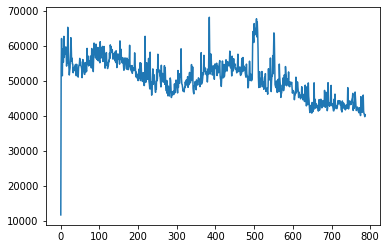

In [7]:
plt.plot(xaxis, yaxis)
plt.show()

In [22]:
outlier_fraction = 0.2
X1 = xaxis.reshape(-1, 1)
X2 = yaxis.reshape(-1, 1)
X_train = np.concatenate((X1, X2), axis=1)
X_train.shape

(788, 2)

In [23]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train)
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_
#print(y_train_pred)
#print(y_train_scores)

In [40]:
print(y_train_pred.shape)
print(xaxis.shape)
scatter = pd.DataFrame([xaxis, y_train_pred]).T
print(scatter)
logicalscatter = scatter[scatter[1] > 0]
print(logicalscatter)

(788,)
(788,)
       0  1
0      0  1
1      1  0
2      2  0
3      3  0
4      4  0
..   ... ..
783  783  0
784  784  0
785  785  0
786  786  1
787  787  0

[788 rows x 2 columns]
       0  1
0      0  1
8      8  1
18    18  1
218  218  1
251  251  1
311  311  1
384  384  1
496  496  1
497  497  1
498  498  1
499  499  1
500  500  1
501  501  1
502  502  1
503  503  1
504  504  1
505  505  1
506  506  1
507  507  1
508  508  1
509  509  1
510  510  1
548  548  1
550  550  1
551  551  1
552  552  1
786  786  1


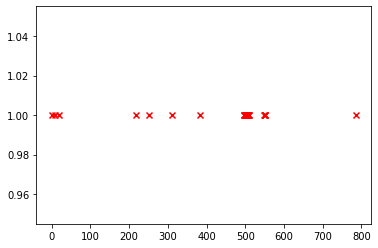

In [44]:
plt.scatter(logicalscatter[0], logicalscatter[1], c='red', marker='x')

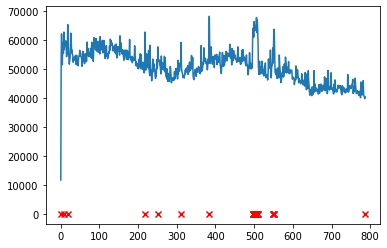

In [45]:
fig = plt.figure()
plt.plot(xaxis, yaxis)
plt.scatter(logicalscatter[0], logicalscatter[1], c='red', marker='x')
plt.show()